In [1]:
import os
import torch
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import segmentation_models_pytorch as smp

from pprint import pprint
from torch.utils.data import DataLoader
from datasets.FloodNet import FloodNetDataset
from utils import display_images_with_masks

In [2]:
SIZE_X = 128
SIZE_Y = 128
n_channels = 3
n_classes = 10
Batch_size = 16
EPOCHS = 100
MODEL = 'unet'
BACKBONE = 'resnet18'
encoder_weights = 'imagenet'
activation = 'softmax'
root = r'E:\Segmentation\datasets\FloodNet-Supervised_v1.0'

In [3]:
train_dataset = FloodNetDataset(root, "train")
valid_dataset = FloodNetDataset(root, "val")
test_dataset = FloodNetDataset(root, "test")

In [4]:
assert set(test_dataset.filenames).isdisjoint(set(train_dataset.filenames))
assert set(test_dataset.filenames).isdisjoint(set(valid_dataset.filenames))
assert set(train_dataset.filenames).isdisjoint(set(valid_dataset.filenames))

In [5]:
print(f"Train size: {len(train_dataset)}")
print(f"Valid size: {len(valid_dataset)}")
print(f"Test size: {len(test_dataset)}")

Train size: 1445
Valid size: 450
Test size: 448


In [6]:
n_cpu = os.cpu_count()
print(f"Number of CPUs: {n_cpu}")
train_dataloader = DataLoader(train_dataset, batch_size=Batch_size, shuffle=True, num_workers=n_cpu)
valid_dataloader = DataLoader(valid_dataset, batch_size=Batch_size, shuffle=False, num_workers=n_cpu)
test_dataloader = DataLoader(test_dataset, batch_size=Batch_size, shuffle=False, num_workers=n_cpu)

Number of CPUs: 8


Sample shape: (128, 128, 3)
Sample label shape: (128, 128)


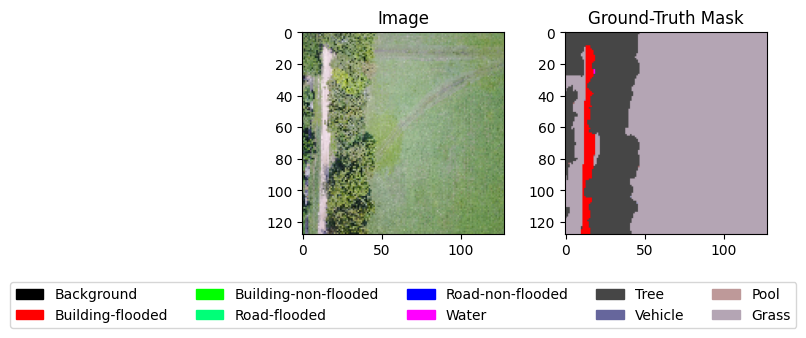

In [16]:
sample = train_dataset[8]

print(f"Sample shape: {sample['image'].shape}")
print(f"Sample label shape: {sample['mask'].shape}")

display_images_with_masks(sample['image'], sample['mask'])

In [17]:
model = smp.Unet(
    encoder_name=BACKBONE,       
    encoder_weights=encoder_weights,    
    in_channels=n_channels,                  
    classes=n_classes,        
    activation=activation)

print(model)

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [20]:
trainer = pl.Trainer(gpus=1, max_epochs=5)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [ ]:
trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=valid_dataloader)